In [51]:
import cv2
import numpy as np
import image

from PIL import Image
import matplotlib.pyplot as plt

In [55]:
img = cv2.imread("Lotus.jpg")
img.shape

(1233, 778, 3)

In [44]:
from numpy import asarray

def my_imfilter(image, kernel):
    data = asarray(image)
    x_pixels, y_pixels, num_channels = data.shape  # represents x, y pixels of image, # channels (R, G, B)
    new_im = data.copy()  # making a new array to copy values to!
    neighbor_range = kernel.shape[0] // 2  # this is a variable that tells us how many neighbors we actually look at (ie for a 3x3 kernel, this value should be 1)
    for x in range(x_pixels):
        for y in range(y_pixels):
            for c in range(num_channels):
                total = 0
                for x_i in range(max(0,x-neighbor_range), min(x_pixels-1, x+neighbor_range)+1):
                    for y_i in range(max(0,y-neighbor_range), min(y_pixels-1, y+neighbor_range)+1):
                        x_k = x_i + neighbor_range - x
                        y_k = y_i + neighbor_range - y
                        kernel_val = kernel[x_k, y_k]
                        total += data[x_i, y_i, c] * kernel_val
                new_im[x, y, c] = total
    return new_im

def combine_images(image1, image2):
    data1 = asarray(image1)
    data2 = asarray(image2)
    x_pixels, y_pixels, num_channels = data1.shape  # represents x, y pixels of image, # channels (R, G, B)
    new_im = data1.copy()  # making a new array to copy values to!
    for x in range(x_pixels):
        for y in range(y_pixels):
            for c in range(num_channels):
                new_im[x, y, c] = (data1[x, y, c] + data2[x, y, c])
    return new_im
    

In [56]:

laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")
sharpenKernel = np.array(([[0, -1, 0],
                           [-1, 9, -1],
                           [0, -1, 0]]),
                             np.float32)/9
meanBlurKernel = np.ones((3, 3), np.float32)/9

laplacian = my_imfilter(img,laplacian)
meanBlur =  my_imfilter(img,meanBlurKernel)
sharpen =  my_imfilter(img,sharpenKernel)

horizontalStack = np.concatenate((img, laplacian, meanBlur, sharpen), axis=1)

cv2.imwrite("Output.jpg", horizontalStack)

cv2.imshow("img, laplacian, meanBlur, sharpen", horizontalStack)

cv2.waitKey(0)
cv2.destroyAllWindows()

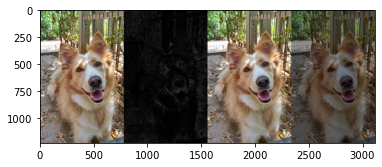

In [57]:
Output=plt.imread("Output.jpg")
plt.imshow(Output)

In [63]:

img = Image.open('Lotus.jpg')
thresh = 200
fn = lambda x : 255 if x > thresh else 0
r = img.convert('L').point(fn, mode='1')
r.save('foo.png')
img = cv2.imread("foo.png")

In [62]:
im3 = combine_images(img, laplacian)

<ipython-input-44-8a58cb431448>:29: RuntimeWarning: overflow encountered in ubyte_scalars
  new_im[x, y, c] = (data1[x, y, c] + data2[x, y, c])


In [60]:
horizontalStack = np.concatenate((img,laplacian, im3), axis=1)

cv2.imwrite("Output1.jpg", horizontalStack)

True

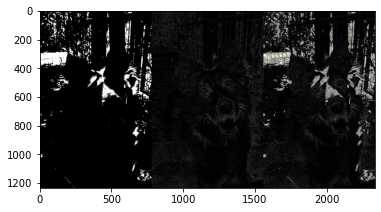

In [61]:
Output1=plt.imread("Output1.jpg")
plt.imshow(Output1)

<ipython-input-44-8a58cb431448>:29: RuntimeWarning: overflow encountered in ubyte_scalars
  new_im[x, y, c] = (data1[x, y, c] + data2[x, y, c])
